# Qualité des données de l'application Cartofriche

## I. Objectif  
Cartofriche est une application servant a recenser les données des friches en France, celle ci se présentent sous deux formes, une carte interactive affichant:  
• la liste des friches par zones et leur statuts avec projets en cours ou non. avec 14 986 données complétées. et des donnees interactives textuelles complétant les informations.  
• Les données agrégées sous forme de tableau contenant 28115 lignes.  
• Et enfin les données issues des différents observatoires. 7239 lignes  

L'objectif de ce Notebook est de travailler sur la qualités des données, leur complétude les valeurs manquantes les doublons, et afin de préparer les données éventuellement pour les analyses statistiques et pour la modélisation.
De comprendre les incohérences entre les quantités de données entre la carte et les tableaux.

Problématique comment la qualité des données affecte l'éxpérience utilisateur et la pertinence de l'utilisation de l'application?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv(r"C:\Users\rovar\Downloads\friches-standard.csv",sep = ";")

C:\Users\rovar\AppData\Local\Temp\ipykernel_27452\854608870.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\rovar\Downloads\friches-standard.csv",sep = ";")


## Description des jeux de données 
les données cartofriche sont issues de data.gouv, 
Le dataset comprend les données issues:  
• des données gouvernementales  
• les données issues des observatoires 

Le jeu de donnée gouvernementale comprend 50 colonnes 
'Afin de constituer une base nationale de pré-recensement des friches, le Cerema s'est appuyé sur deux sources de données :

**BASOL** est une base de données nationale sur les sites et sols potentiellement pollués appelant une action des pouvoirs publics, produites par le Ministère de la Transition Ecologique ; les données utilisées sont issues du travail de consolidation de la base réalisé par le collectif Lou Dupont, et diffusé sur data.gouv.fr ;  
**BASIAS** est une base de données de l’inventaire historique des sites industriels et activités de service, produites par le Ministère de la Transition Ecologique et le BRGM ;  les données utilisées sont également issues du travail de consolidation de la base réalisé par le collectif Lou Dupont, et diffusé sur data.gouv.fr.'  

__ref__ https://artificialisation.developpement-durable.gouv.fr/agir-et-etre-accompagne/cartofriches/donnees-utilisees

In [8]:
df.columns.to_list()

Index(['site_id', 'site_nom', 'site_type', 'site_adresse', 'site_identif_date',
       'site_actu_date', 'site_url', 'site_ademe_url', 'site_securite',
       'site_occupation', 'site_statut', 'site_projet_url',
       'site_reconv_annee', 'site_reconv_type', 'activite_libelle',
       'activite_code', 'activite_fin_annee', 'comm_nom', 'comm_insee',
       'bati_type', 'bati_nombre', 'bati_surface', 'bati_pollution',
       'bati_vacance', 'bati_patrimoine', 'bati_etat', 'local_ancien_annee',
       'local_recent_annee', 'proprio_type', 'proprio_personne', 'proprio_nom',
       'sol_pollution_annee', 'sol_pollution_existe', 'sol_pollution_origine',
       'sol_pollution_commentaire', 'sol_depollution_fiche',
       'unite_fonciere_surface', 'unite_fonciere_refcad', 'urba_zone_type',
       'urba_zone_lib', 'urba_zone_formdomi', 'urba_doc_type',
       'desserte_distance', 'desserte_commentaire', 'source_nom', 'source_url',
       'source_producteur', 'source_contact', 'geompoint', 'geo

## II. Audit Qualité

In [4]:
#Audit qualité
audit_report = []

for col in df.columns:
    series = df[col]
    audit_report.append({
        "Colonne": col,
        "Type": series.dtype,
        "Nb valeurs uniques": series.nunique(dropna=True),
        "Top valeur": series.mode().iloc[0] if not series.mode().empty else None,
        "Fréquence top valeur": series.value_counts(dropna=True).iloc[0] if not series.value_counts(dropna=True).empty else None,
        "Nb de NaN": series.isna().sum(),
        "% de NaN": round(series.isna().mean() * 100, 2)
    })

audit_df = pd.DataFrame(audit_report)
audit_df

,Colonne,Type,Nb valeurs uniques,Top valeur,Fréquence top valeur,Nb de NaN,% de NaN
0,site_id,object,28115,01001_32316,1.0,0,0.00
1,site_nom,object,24071,Décharge,415.0,0,0.00
2,site_type,object,19,inconnu,16005.0,0,0.00
3,site_adresse,object,3713,LE VILLAGE,30.0,24125,85.81
4,site_identif_date,object,581,2022-10-10,15736.0,0,0.00
5,site_actu_date,object,532,2022-10-10,15587.0,0,0.00
6,site_url,object,16939,https://www.suippes.fr/9143-2/,14.0,11120,39.55
7,site_ademe_url,float64,0,None,NaN,28115,100.00
8,site_securite,object,5,inconnu,20132.0,5822,20.71
9,site_occupation,object,20,inconnu,25850.0,0,0.00


## Aperçu de la répartition des Valeurs manquantes dans le temps

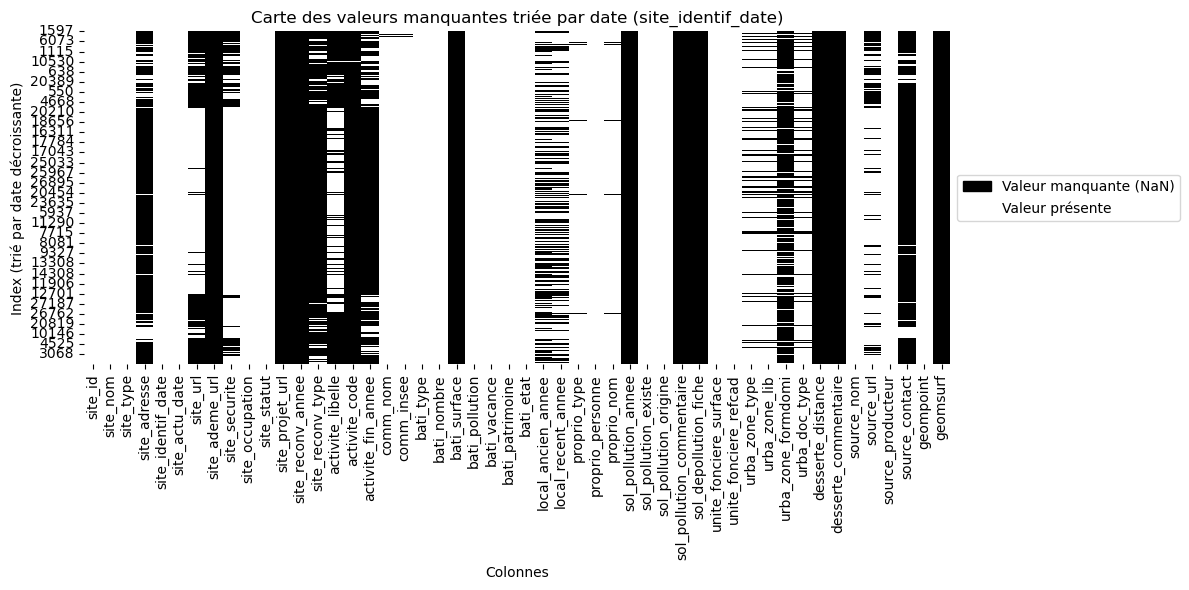

In [23]:
#Valeurs manquantes sur les données gouvernementales
# Conversion de la colonne de date
df["site_identif_date"] = pd.to_datetime(df["site_identif_date"], errors='coerce')

# Tri décroissant par la date
df_sorted = df.sort_values("site_identif_date", ascending=False)

# Carte des valeurs manquantes avec légende personnalisée
plt.figure(figsize=(12, 6))
sns.heatmap(
    df_sorted.isna(),
    cmap=sns.color_palette(["white", "black"]),
    cbar=False
)

# Légende : noir = présent, blanc = manquant
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='black', edgecolor='black', label='Valeur manquante (NaN)'),
    Patch(facecolor='white', edgecolor='white', label='Valeur présente')
]
plt.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1.0, 0.5)
)


plt.title("Carte des valeurs manquantes triée par date (site_identif_date)")
plt.xlabel("Colonnes")
plt.ylabel("Index (trié par date décroissante)")
plt.tight_layout()
plt.show()

In [34]:
print(df["site_identif_date"].iloc[20210])
print(df["site_identif_date"].iloc[27187]) 

2022-10-10 00:00:00
2021-12-31 00:00:00


**Commentaire:** Les données ci dessus montrent la répartition des Na dans le temps, on constate une zone entre 12/2021 10/2022 ou la complétude de certainnes données comme **site_url, site_securite, activite_libelle** sont plus importantes
⚠️problématique qui gére ces données, y a t 'il une maintenance automatique y a t'il des observatoires qui complètent moins bien 

# Feuille de route:
Données gouvernementales (friches-standard.csv)
- les valeurs manquantes 
- ~~doublons~~ à vérifier  par subset 
- unifomisation des features et des types, uniformisation de la casse 
- enrichissement des données : croisement  datasets gouvernementales avec datasets des observatoires
- enrcichissement scrapping gpkg (données textuelles sur l'api) 
- enrichissement avec données textuelles
- enrichissement avec données externes ex( données toxicologiques)
- analyse statistique descriptive et analyse sur l'équilibre des données
- 
# Brain storm
problèmes rencontrés: arborescence pour accéder aux données annexes (eg trop complexes.
Incohérence des volumes entre les différents datasets carte, enrichies et observatoires -> besoin d'uniformisation pour faciliter la visibilité
Pas assez d'indicateur pour prendre des décisions financieres et extra financieres: besoin d'agrégation 
Pas assez d'indicateur écologique alors que c'est une application faite dans le cadre de l'écologie

## III ANALYSE DETAILLEE DES VARIABLES

**La complétude et la pertinence** de chaque  variable est analysée dans un premier temps pour évaluer la qualité générale des données fournies par cartofriche et leur provenance: 

In [18]:
#Analyse de typologie 
import pandas as pd
import re

def detect_typo_patterns(series):
    audit = []
    for val in series.dropna().unique():
        val_str = str(val)
        length = len(val_str)
        pattern = re.sub(r'\d', '0', val_str)  # transforme 61214_34555 → 00000_00000
        pattern = re.sub(r'[a-zA-Z]', 'A', pattern)  # si lettres présentes
        pattern = re.sub(r'[^0A_]', 'X', pattern)  # tout autre caractère

        audit.append({
            "Exemple": val_str,
            "Longueur": length,
            "Pattern typologique": pattern,
            "Fréquence": series[series == val].count()
        })

    df_patterns = pd.DataFrame(audit)
    return df_patterns.groupby(["Pattern typologique"]).agg({
        "Exemple": "first",
        "Longueur": "first",
        "Fréquence": "sum"
    }).sort_values("Fréquence", ascending=False).reset_index()


# 1) site_nom

In [35]:
#site_id
detect_typo_patterns(df["site_nom"])

,Pattern typologique,Exemple,Longueur,Fréquence
0,00000_00000,93027_35701,11,1923
1,AAAAAA,Friche,6,432
2,AXAAAAAA,Décharge,8,432
3,AAAAAAAA,Sotralec,8,309
4,AAAAAAAXAAAAAAA,Elevage avicole,15,272
...,...,...,...,...
13845,AAAAAAX00XAAAAAXAAXAAAAA,Maison 12 route de flers,24,1
13846,AAAAAAX00XAAAX0XAAXAAAAA,Terril 39 dit 5 de Noeux,24,1
13847,AAAAAAX00XAAAX0XAAXAAAAAXAAAXAAAAA,Terril 60 dit 2 de Noeux les Mines,34,1
13848,AAAAAAX00XAAAXAAAAAAXAAAA,Maison 47 rue sainte anne,25,1


⚠️vérifier pertinence existence site_nom et site_id et redondance, Pourquoi il y a des données de la forme 00000_00000
quels lignes ont tendance a avoir des données manquantes? pourquoi? besoin de standardisé l'entrée des données? 

# 2) site_id

In [21]:
detect_typo_patterns(df["site_id"])

,Pattern typologique,Exemple,Longueur,Fréquence
0,00000_00000,61214_34555,11,18750
1,00000_0000,62178_4393,10,8128
2,00000_000,16154_221,9,869
3,AA_00000,NA_35083,8,131
4,0A000_00000,2A028_15474,11,113
5,00000_00,76312_61,8,83
6,0A000_0000,2B185_1532,10,30
7,00000_0,08363_1,7,9
8,00000X00000_00000,"54286,54136_35164",17,1
9,0A000_000,2B082_112,9,1


⚠️voir le rapport entre les typologies et la provenance ou signification de la typologie

# 3) site_type

site_type comprend les données des différents types de friches:  
• avec une liste standards avec 19 valeurs différentes,    
• et trois types:  **mixtes, inconnu, autre** qui sont des catégories ambigues qui doivent être clairifiées,  
• peuvent elles être interpolé ou complétees?

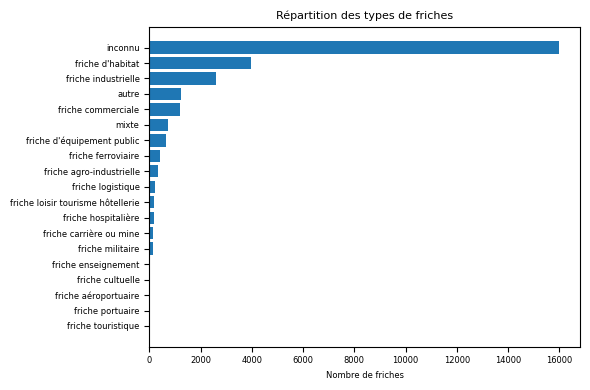

In [24]:
# Comptage des catégories sans 'inconnu'
site_counts = df["site_type"].value_counts()
site_counts = site_counts.sort_values(ascending=True)

plt.figure(figsize=(6, 4))
plt.barh(site_counts.index, site_counts.values)
plt.xlabel("Nombre de friches", fontsize=6)
plt.title("Répartition des types de friches", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

**commenataire:** Dans le cadre d'un modèle de machine learning il faudrait réechantilloner cette variable, et dabord résoudre les variables ambigues: comment sont réparties ces variables ambigues -> agrégation

## 4) site_adress

In [37]:
detect_typo_patterns(df["site_adresse"])

,Pattern typologique,Exemple,Longueur,Fréquence
0,AAXAAAAAAA,LE VILLAGE,10,46
1,000XAAAXAAXAAAAA,259 RUE DE PLAIN,16,27
2,00XAAAXAAXAAAAAA,53 RUE DU MOULIN,16,26
3,000XAAAXAAXAAAAAAA,159 rue de Mereges,18,25
4,000XAAAXAAXAAAAAAAA,273 rue de Bordeaux,19,24
...,...,...,...,...
2092,00XAAAXAAXAXAAAAAXXAAAAAA,"33 CHE DE L USINE, SAPOIS",25,1
2093,00XAAAXAAXAXAAAAAAAA,11 rue de l'abattoir,20,1
2094,00XAAAXAAXAXAAAA,84 rue de l'Etat,16,1
2095,00XAAAXAAXAAXAXAAAAAAAA,24 rue de la République,23,1


**Commentaire:** la variable site adresse est inhomgène avec 86% de Na des typologies variables, problème de casses, des abréviations dans des cas et d'autres sans abréviation des lieux dits.  
Quels types de friches ont tendance  à ne pas avoir d'adresses? Pourquoi ? réponse partielle, **des friches sur des lieux-dits**

## Analyse  de la qualité du Dataset avec des "colonnes obligatoires"

In [24]:
# Liste exacte des colonnes obligatoires selon Cartofriches
colonnes_obligatoires = [
    "site_id", "site_nom", "site_type",
    "site_identif_date", "site_actu_date",
    "comm_nom", "comm_insee",
    "source_nom", "geompoint"
]

# Chargement uniquement de ces colonnes
df_obligatoires = pd.read_csv(
    r"C:\Users\rovar\Downloads\friches-standard.csv",
    sep=";",                      # adapte si besoin
    usecols=colonnes_obligatoires,
    encoding="utf-8-sig",         # change si tu as des caractères bizarres
    low_memory=False
)

df_obligatoires.head(5)

,site_id,site_nom,site_type,site_identif_date,site_actu_date,comm_nom,comm_insee,source_nom,geompoint
0,61214_34555,rue de la garenne,friche d'habitat,2025-03-05,2025-03-05,L'Aigle,61214,EPF Normandie,POINT (0.6256966 48.76207)
1,57097_23384,Sotralec,friche industrielle,2022-01-01,2022-01-01,BOULAY-MOSELLE,57097,EPF Grand Est,POINT (6.49563 49.17622)
2,93027_35701,93027_35701,autre,2025-04-07,2025-04-07,La Courneuve,93027,Institut Paris Région,POINT (2.413969 48.93915)
3,80126_24311,80126_24311,mixte,2023-08-17,2023-08-17,BOUTTENCOURT,80126,DDT de la Somme,POINT (1.60458 49.94721)
4,61386_34635,Les Futiaux,friche d'habitat,2024-08-13,2024-08-13,Saint-Evroult-Notre-Dame-du-Bois,61386,EPF Normandie,POINT (0.4367191 48.79385)


In [25]:
#valeurs manquantes sur les colonnes obligatoires:
df_obligatoires.isna().sum()
#Redéfinir pourquoi les colonnes sont obligatoires

site_id                0
site_nom               0
site_type              0
site_identif_date      0
site_actu_date         0
comm_nom             132
comm_insee           132
source_nom             0
geompoint              0
dtype: int64

In [26]:
# Vérification des lignes manquantes
missing_comm_nom = df_obligatoires["comm_nom"].isnull()
missing_comm_insee = df_obligatoires["comm_insee"].isnull()

# Vérifie si les lignes sont les mêmes
same_missing = (missing_comm_nom == missing_comm_insee).all()
matching_indices = df_obligatoires[missing_comm_nom & missing_comm_insee].index.tolist()

print("Les lignes manquantes sont-elles identiques :", same_missing)
print("Nombre de lignes concernées :", len(matching_indices))

Les lignes manquantes sont-elles identiques : True
Nombre de lignes concernées : 132


ref : https://www.bing.com/search?pglt=297&q=urbansimul&cvid=82b30ecbddb849a39757db90987acd2d&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOTIGCAEQABhAMgYIAhAAGEAyBggDEAAYQDIGCAQQABhA0gEIMTU3MGowajGoAgCwAgA&FORM=ANNTA1&PC=DCTS